<a href="https://colab.research.google.com/github/Just3nzo/Covid_Project/blob/main/141_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal for this project will be to look into South Korea Covid-19 data and prepare a plan for a country to fight Covid-19 pandemic.

## Importing data

#### Imports

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
df_patient = pd.read_csv("/content/drive/MyDrive/1.4-files/PatientInfo.csv")
df_policy = pd.read_csv("/content/drive/MyDrive/1.4-files/Policy.csv")
df_case = pd.read_csv("/content/drive/MyDrive/1.4-files/Case.csv")
df_region = pd.read_csv("/content/drive/MyDrive/1.4-files/Region.csv")
df_search = pd.read_csv("/content/drive/MyDrive/1.4-files/SearchTrend.csv")
df_floating = pd.read_csv("/content/drive/MyDrive/1.4-files/SeoulFloating.csv")
df_time = pd.read_csv("/content/drive/MyDrive/1.4-files/Time.csv")
df_tage = pd.read_csv("/content/drive/MyDrive/1.4-files/TimeAge.csv")
df_tgender = pd.read_csv("/content/drive/MyDrive/1.4-files/TimeGender.csv")
df_tprovince = pd.read_csv("/content/drive/MyDrive/1.4-files/TimeProvince.csv")
df_weather = pd.read_csv("/content/drive/MyDrive/1.4-files/Weather.csv")


#### Data

In [95]:
df_patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [96]:
df_policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [97]:
df_case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [98]:
df_region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [99]:
df_search.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [100]:
df_floating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [101]:
df_time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [102]:
df_tage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [103]:
df_tgender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [104]:
df_tprovince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [105]:
df_weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


## EDA

In [106]:
df_patient["age"].value_counts()

20s     899
50s     667
30s     523
40s     518
60s     482
70s     232
10s     178
80s     170
0s       66
90s      49
100s      1
Name: age, dtype: int64

Most of the patients are in their 20's. More in depth analysis can be done for age group comparisons of covid cases.

In [107]:
df_patient.sex.value_counts()

female    2218
male      1825
Name: sex, dtype: int64

Displaying count of male and female patients

In [108]:
df_patient_copy = df_patient.copy()

In [109]:
df_patient_copy.contact_number.dropna(inplace=True)

In [110]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):

    print(df_patient_copy.contact_number.value_counts())

3             96
2             92
1             87
0             83
4             51
5             43
6             24
9             21
7             20
11            19
8             18
10            18
16            11
14            11
15            10
19            10
23            10
27             9
17             9
13             7
12             7
30             6
24             6
25             6
21             6
26             5
31             5
18             5
40             5
22             5
41             4
20             4
34             4
-              4
51             3
39             3
29             3
28             2
38             2
74             2
45             2
71             2
37             2
53             2
131            2
42             2
86             2
35             1
70             1
130            1
75             1
106            1
174            1
78             1
33             1
89             1
61             1
290            1
113           

Looking for extreme or non numeric values

In [111]:
df_patient_copy = df_patient_copy[df_patient_copy.contact_number != '-'] # Droping non numeric values found

In [112]:
df_patient_copy["contact_number"] = df_patient_copy["contact_number"].astype(str).astype(float)

In [113]:
df_patient_copy = df_patient_copy[df_patient_copy.contact_number < 10000] # Removing inncorect contact number values, such as: 6100000098, 6100000099 and 1000000796

In [114]:
df_patient_copy["contact_number"] = df_patient_copy["contact_number"].astype(int)

In [115]:
print(df_patient_copy.contact_number.astype(int).describe())

count     784.000000
mean       17.325255
std        67.533881
min         0.000000
25%         2.000000
50%         4.000000
75%        14.000000
max      1160.000000
Name: contact_number, dtype: float64


On average, one covid patient has contact with 17 people. Maximum number is 1160, the mean in 50th percentile is only at 4, and std is 67.5. We can try looking for outliers and remove them if any appears.

In [116]:
df_patient_copy["contact_number"].sort_values(ascending=False).head(20)

1463    1160
1312    1091
1318     485
1600     450
2215     422
1323     296
2218     290
1439     185
3628     174
1350     159
1604     156
5159     140
1440     131
1313     131
3546     130
12       117
3707     113
2059     107
3577     106
2214      95
Name: contact_number, dtype: int64

We can see that 2 values at the top stands out the most, we will remove them and look at the statistics again.

In [117]:
df_patient_copy = df_patient_copy[df_patient_copy.contact_number < 500]

In [118]:
print(df_patient_copy.contact_number.astype(int).describe())

count    782.000000
mean      14.491049
std       37.637693
min        0.000000
25%        2.000000
50%        4.000000
75%       13.750000
max      485.000000
Name: contact_number, dtype: float64


On average, one person has contact with 14.5 people after getting infected, although standard deviation is 37.6 so the number can vary a lot. Question to ask: how long does a period between symptom onset date and tested positive date lasts?

In [119]:
df_patient_copy["confirmed_date"] = pd.to_datetime(df_patient_copy["confirmed_date"], format='%Y/%m/%d')

In [120]:

print(df_patient_copy["confirmed_date"].min())
print(df_patient_copy["confirmed_date"].max())

2020-01-23 00:00:00
2020-06-30 00:00:00


Data of confirmed cases is from January 23rd to June 14th of 2020. Question to ask: How long does it take from symptons onset date to confirmed case of covid-19

In [121]:
df_policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


Question to ask: Government policy affects on covid cases

Further questions:

1.   Correlation between age and how long patients stay in hospital
2.   How long it takes between getting infected and tested positive?
3.   Age group comparison for confirmed/deceased
3.   Positive cases per 100000 people. Confirmed cases numbers in provinces     compared to population
5.   Policy effects on confirmed cases

In [122]:
df_patient.infection_case.value_counts()

contact with patient                             1610
overseas inflow                                   840
etc                                               703
Itaewon Clubs                                     162
Richway                                           128
Guro-gu Call Center                               112
Shincheonji Church                                107
Coupang Logistics Center                           80
Yangcheon Table Tennis Club                        44
Day Care Center                                    43
SMR Newly Planted Churches Group                   36
Onchun Church                                      33
Bonghwa Pureun Nursing Home                        31
gym facility in Cheonan                            30
Ministry of Oceans and Fisheries                   28
Wangsung Church                                    24
Cheongdo Daenam Hospital                           21
Dongan Church                                      17
Eunpyeong St. Mary's Hospita

Contact with pacient is the number 1 risk of getting infected for covid-19

In [123]:
df_weather.date

0        2016-01-01
1        2016-01-01
2        2016-01-01
3        2016-01-01
4        2016-01-01
            ...    
26266    2020-06-29
26267    2020-06-29
26268    2020-06-29
26269    2020-06-29
26270    2020-06-29
Name: date, Length: 26271, dtype: object

Weather date starts from 2016

In [124]:
df_time["date"] = pd.to_datetime(df_time["date"], format='%Y-%m-%d')

In [125]:
df_time1 = df_time[["date", "confirmed"]]

In [126]:
df_time2 = df_time.copy()

In [127]:
df_time2 = df_time2.drop("time", axis=1)

In [128]:
df_time2 = df_time2.groupby(df_time1['date'].dt.strftime('%B'))[['confirmed', "test", "negative", "released", "deceased"]].sum().sort_values(by="confirmed").reset_index()

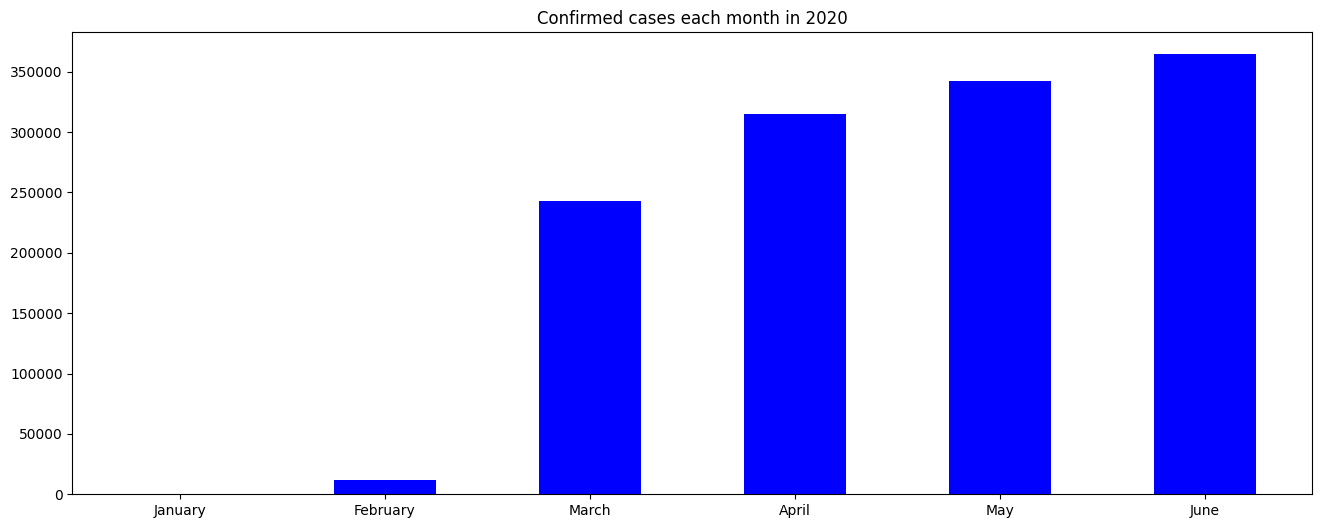

In [129]:
fig = plt.figure(figsize=(16,6))
ax = plt.subplot(111)
ax.bar(df_time2["date"], df_time2["confirmed"], width=0.5, color='b', align='center')
ax.set_title("Confirmed cases each month in 2020")
plt.show()

Eventhough we did not subtract released and deceased number from confirmed cases, there is a huge spike seen between months of February and March, this indicates that covid-19 infection spread is rapid.

In [130]:
ax.bar(df_time2["date"], df_time2["negative"], width=0.5, color='g', align='center')
ax.bar(df_time2["date"], df_time2["released"], width=0.5, color='r', align='center')
ax.bar(df_time2["date"], df_time2["deceased"], width=0.5, color='b', align='center')
ax.bar(df_time2["date"], df_time2["test"], width=0.5, color='y', align='center')

<BarContainer object of 6 artists>

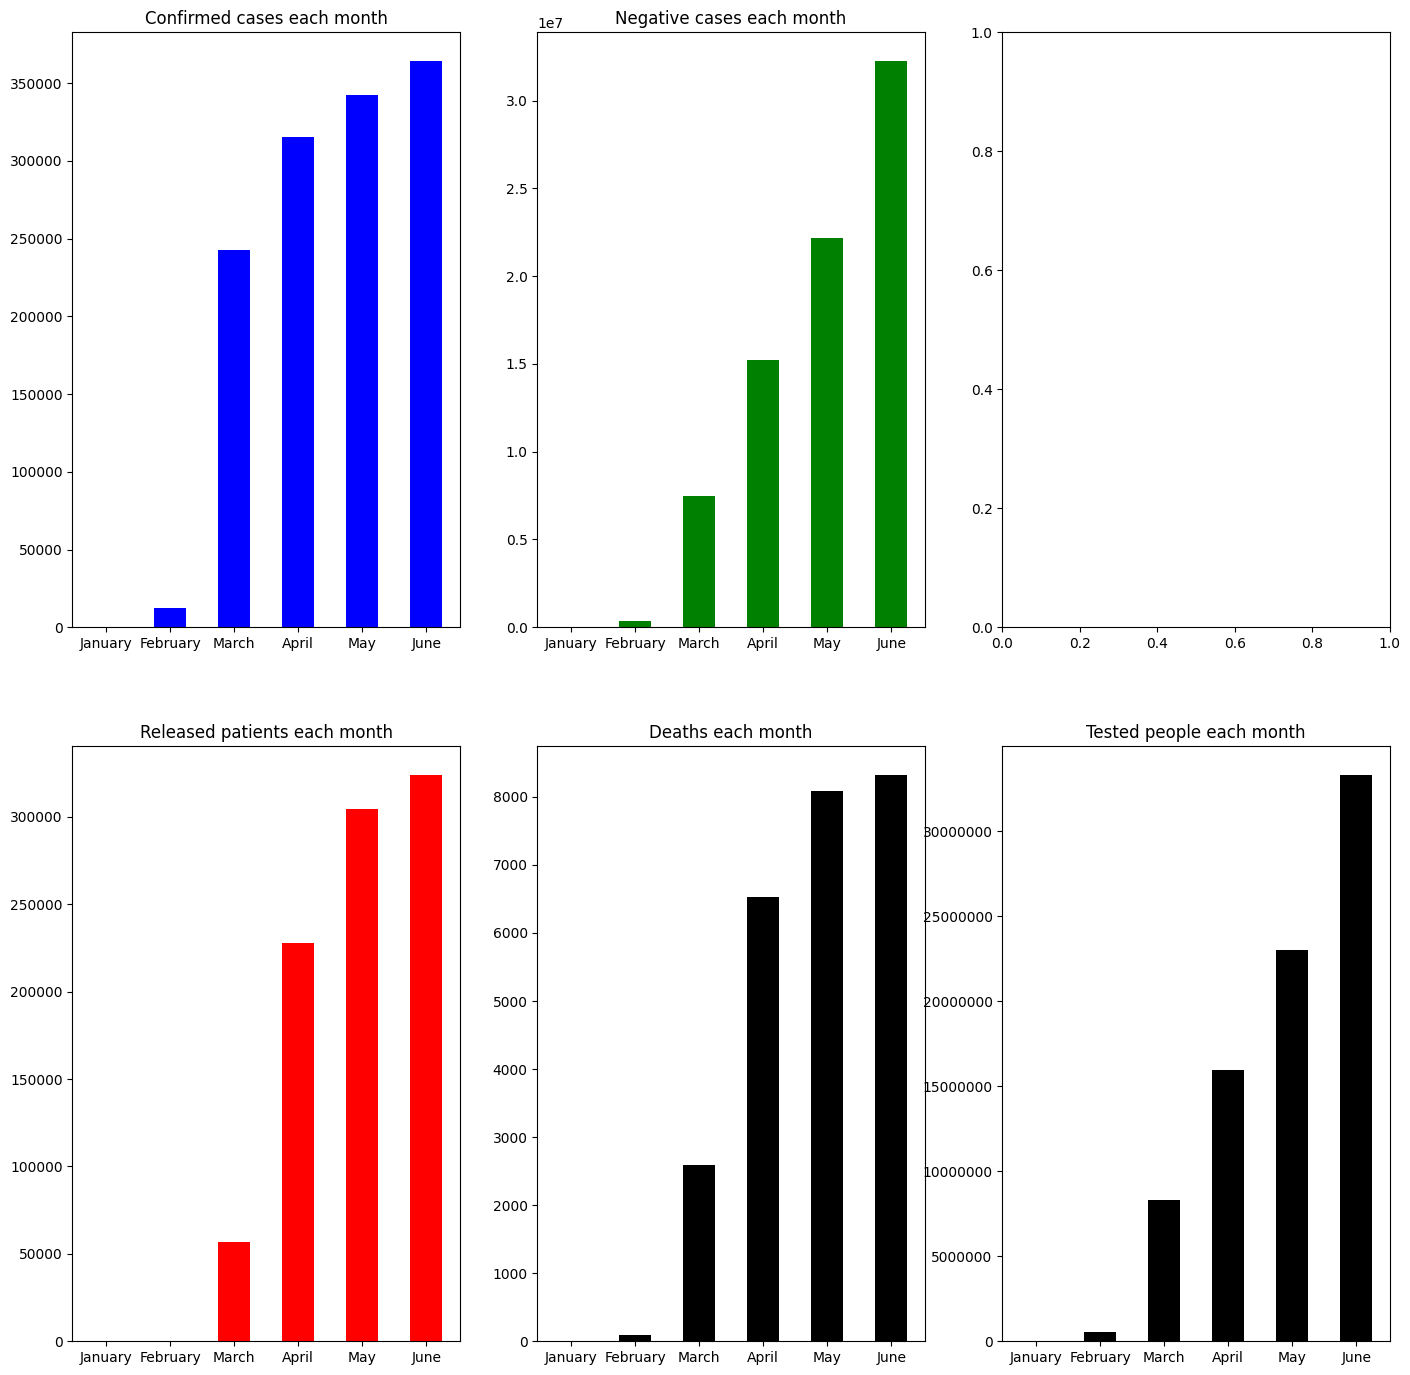

In [131]:
fig, axs = plt.subplots(2, 3, figsize=(17, 17))

axs[0, 0].bar(df_time2["date"], df_time2["confirmed"], width=0.5, color='b', align='center')
axs[0, 0].set_title("Confirmed cases each month")

axs[0, 1].bar(df_time2["date"], df_time2["negative"], width=0.5, color='g', align='center')
axs[0, 1].set_title("Negative cases each month")
plt.ticklabel_format(style = 'plain')

axs[1, 0].bar(df_time2["date"], df_time2["released"], width=0.5, color='r', align='center')
axs[1, 0].set_title("Released patients each month")

axs[1, 1].bar(df_time2["date"], df_time2["deceased"], width=0.5, color='black', align='center')
axs[1, 1].set_title("Deaths each month")

axs[1, 2].bar(df_time2["date"], df_time2["test"], width=0.5, color='black', align='center')
axs[1, 2].set_title("Tested people each month")

plt.show()

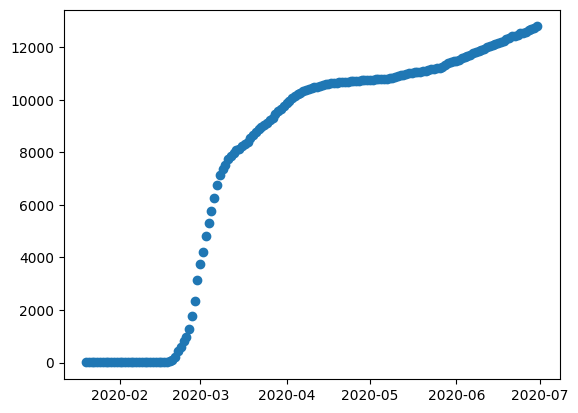

In [132]:
dates = matplotlib.dates.date2num(df_time1["date"])
plt.plot_date(dates, df_time1["confirmed"])

ax.set_title("Confirmed cases each day in 2020")

plt.show()

Number of covid cases has doubled within 3 days from couple days before March of 2020 until March 1st

## 1. Correlation between age and how long patients stay in hospital






In [133]:
df_patient_date = df_patient[["age", "confirmed_date", "released_date"]].copy()

In [134]:
df_patient_date = df_patient_date.dropna()

In [135]:
df_patient_date["confirmed_date"] = pd.to_datetime(df_patient_date["confirmed_date"], format='%Y/%m/%d')
df_patient_date["released_date"] = pd.to_datetime(df_patient_date["released_date"], format='%Y/%m/%d')


In [136]:
df_patient_date["Duration"] = (df_patient_date["released_date"] - df_patient_date["confirmed_date"]).dt.days

In [137]:
df_patient_date.age.value_counts()

20s     409
50s     300
40s     241
30s     211
60s     173
70s      83
10s      65
80s      60
0s       19
90s      14
100s      1
Name: age, dtype: int64

Little data of age groups 100s, 90s and 0s

In [138]:
df_patient_grouped = df_patient_date[["age", "Duration"]]

In [139]:
x = df_patient_grouped.groupby(["age"])["Duration"].mean().sort_values().reset_index()

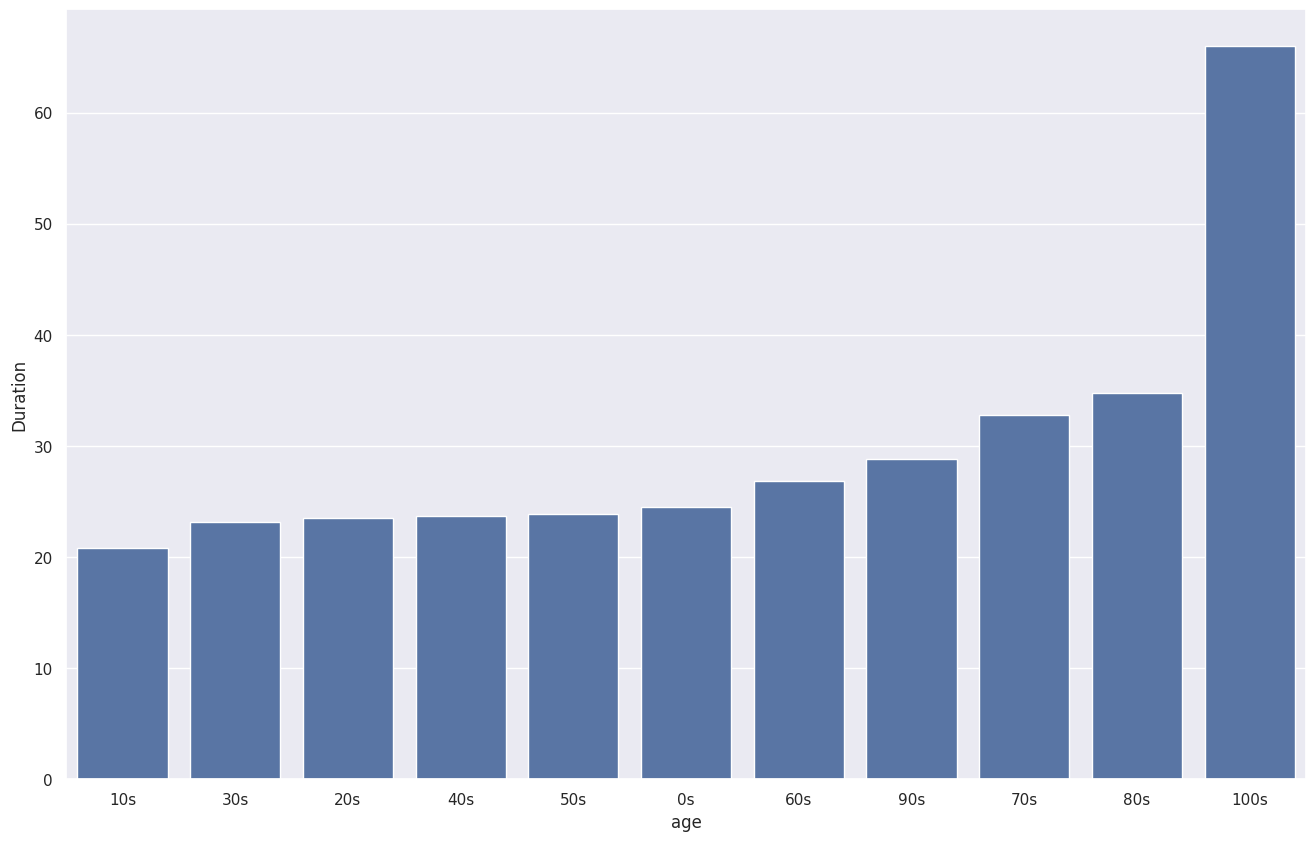

In [140]:
sns.set(rc={'figure.figsize':(16,10)})
sns.barplot(x=x.age, y=x.Duration)

ax.set_title("Age against duration spent in hospital")

plt.show()

From the barplot we can see that the duration of how long patients stay in the hospital is dependant on age group a patient falls in. It proportionally grows from 10-90 years of age, except the outlier of kids age 0 to 10 and for 100+ years of age because only one person falls in this category. The barplot shows that kids age 0-10 and seniors age 60+ takes longest time to recover.

In [141]:
x['age'] = x['age'].str.rstrip('s').astype(int)

In [142]:
x["age"].corr(x["Duration"])

0.70011828699041

Correlation score also shows that there is quite high correlation between age and how long patient stays in hostpital

## 2. How long it takes between symptom onset date and tested positive date?

In [143]:
df_patient_2 = df_patient[["symptom_onset_date", "confirmed_date"]].copy()

In [144]:
df_patient_2 = df_patient_2.dropna()

In [145]:
df_patient_2['symptom_onset_date']

0       2020-01-22
3       2020-01-26
13      2020-02-06
14      2020-02-11
25      2020-02-21
           ...    
5127    2020-04-14
5128    2020-04-20
5131    2020-05-14
5133    2020-05-17
5134    2020-05-21
Name: symptom_onset_date, Length: 689, dtype: object

We have data from 2020-01-22 until 2020-05-21

In [146]:
df_patient_2["symptom_onset_date"] = pd.to_datetime(df_patient_2["symptom_onset_date"], format='%Y-%m-%d', errors='coerce')
df_patient_2["confirmed_date"] = pd.to_datetime(df_patient_2["confirmed_date"], format='%Y-%m-%d')

In [147]:
df_patient_2["Duration"] = (df_patient_2["confirmed_date"] - df_patient_2["symptom_onset_date"]).dt.days

In [148]:
df_patient_2 = df_patient_2.drop(columns=["symptom_onset_date", "confirmed_date"])

In [149]:
df_patient_2.value_counts()

Duration
 1.0        138
 2.0        112
 3.0         96
 4.0         63
 5.0         62
 6.0         47
 8.0         34
 7.0         30
 0.0         26
 9.0         17
 10.0        15
 11.0        10
 13.0         8
 12.0         7
 15.0         4
 45.0         3
-1.0          2
 14.0         2
 16.0         2
 33.0         1
 47.0         1
 42.0         1
 41.0         1
-8.0          1
 27.0         1
 25.0         1
 19.0         1
-2.0          1
 48.0         1
dtype: int64

Some of the values are negative, let's remove them

In [150]:
mask = df_patient_2 >= 0

df_patient_2 = df_patient_2[mask]

In [151]:
df_patient_2.mean()

Duration    4.552632
dtype: float64

It takes an average of 4.5 days to be tested positive for Covid-19 after feeling first symptoms.

## 3. Age group comparison for confirmed/deceased

In [152]:
df_tage1 = df_tage.copy()
df_tage1.drop(columns=['date', 'time', 'deceased'], inplace=True)
df_tage1 = df_tage1.groupby(by='age').mean()

In [153]:
df_tage2 = df_tage.copy()
df_tage2.drop(columns=['date', 'time', 'confirmed'], inplace=True)
df_tage2 = df_tage2.groupby(by='age').mean()

In [154]:
df_tage1.reset_index(inplace=True)
df_tage2.reset_index(inplace=True)

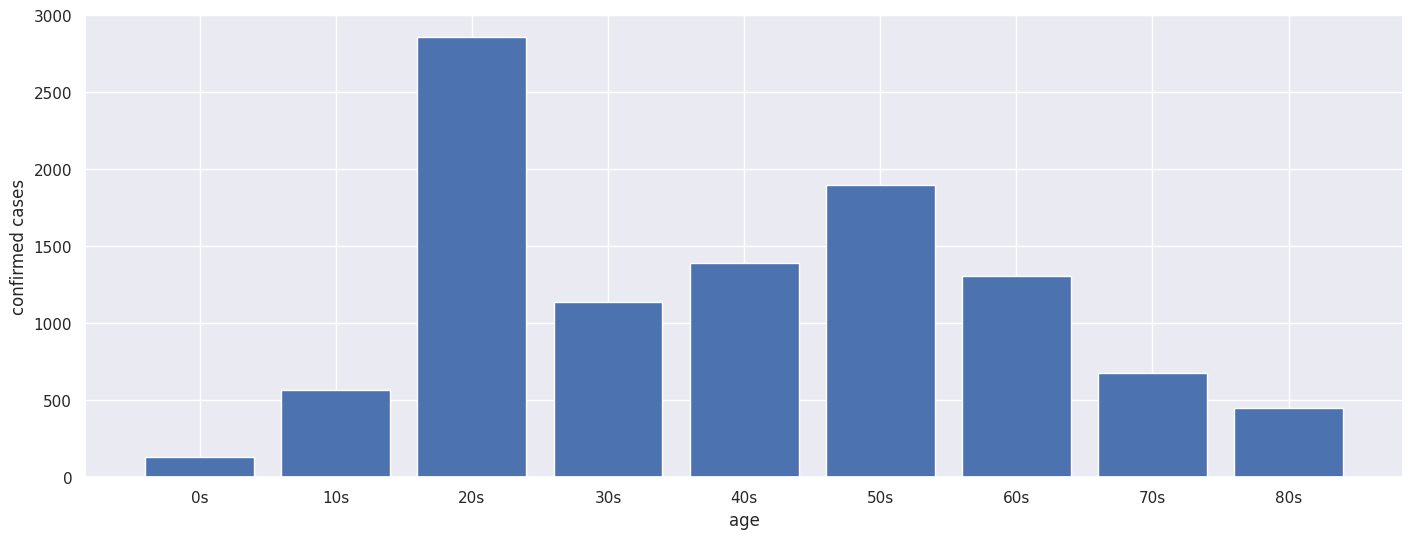

In [155]:
fig = plt.figure(figsize=(17,6))
plt.xlabel("age")
plt.ylabel("confirmed cases")
plt.bar(x=df_tage1.age, height=df_tage1.confirmed)

ax.set_title("Confirmed cases for each age group")

plt.show()

Barplot shows that people in their 20s has the biggest confirmed cases numbers which is the most outgoing group of people.

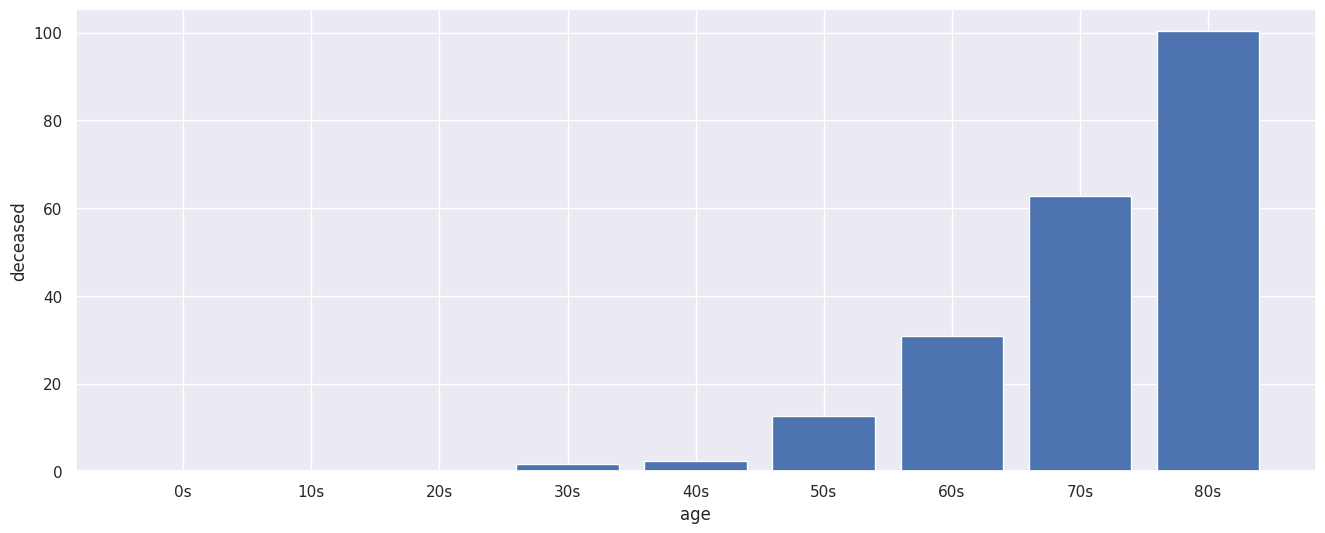

In [156]:
fig = plt.figure(figsize=(16,6))
plt.xlabel("age")
plt.ylabel("deceased")
plt.bar(x=df_tage2.age, height=df_tage2.deceased)

ax.set_title("Deceased cases for each age group")

plt.show()

Barplot clearly indicates that age and death from covid-19 are highly correlated. Eventhough this is not the barplot of a rate and numbers of infected are higher for younger people, this clearly shows that covid-19 is way more deadly for age group of 50+ rather than 0-50.

## 4. Positive cases per 100000 people. Confirmed cases numbers in provinces compared to population.

Importing South Korea provinces population data of 2020. Source: https://www.citypopulation.de/en/southkorea/cities/

### Preparing data

In [157]:
df_province_population = pd.read_csv('/content/drive/MyDrive/1.4-files/province_population.csv')

In [158]:
df_ppopulation_merged = df_tprovince.merge(df_province_population, how='inner')

In [159]:
# Preparing data
df_ppopulation_merged['current_confirmed'] = ''
df_ppopulation_merged['current_confirmed'] = pd.to_numeric(df_ppopulation_merged['current_confirmed'])
df_ppopulation_merged['current_confirmed'] = df_ppopulation_merged['current_confirmed'].fillna(0)
df_ppopulation_merged['population(2020)'] = df_ppopulation_merged['population(2020)'].replace(',', '', regex=True)
df_ppopulation_merged['population(2020)'] = df_ppopulation_merged['population(2020)'].astype(int)
df_ppopulation_merged['date'] = pd.to_datetime(df_ppopulation_merged['date'])

In [160]:
provinces = df_ppopulation_merged['province'].unique()

province_dataframes = {}

for province in provinces:
    df_name = f"df_ppopulation_{province.lower().replace('-', '').replace(' ', '')}"
    province_dataframes[df_name] = df_ppopulation_merged.loc[df_ppopulation_merged['province'] == province].reset_index(drop=True)

In [161]:
def calculate_statistics(df):
    df['current_confirmed'] = df['confirmed'] - df['released'] - df['deceased']

    for i in range(1, len(df)):
        df.at[i, 'current_confirmed'] = df.at[i-1, 'current_confirmed'] + df.at[i, 'confirmed'] - df.at[i, 'released'] - df.at[i, 'deceased']

    df['cases_per_100k'] = df['current_confirmed'] / (df['population(2020)'] / 100000)
    df['cases_per_100k'] = pd.to_numeric(df['cases_per_100k']).fillna(0)

provinces = df_ppopulation_merged['province'].unique()

for province in provinces:
    df_name = f"df_ppopulation_{province.lower().replace('-', '').replace(' ', '')}"
    calculate_statistics(province_dataframes[df_name])


For each province, we subtract released and deceased from confirmed cases to get current covid cases number. Calculating covid cases per 100 000 people.

### Visualizations

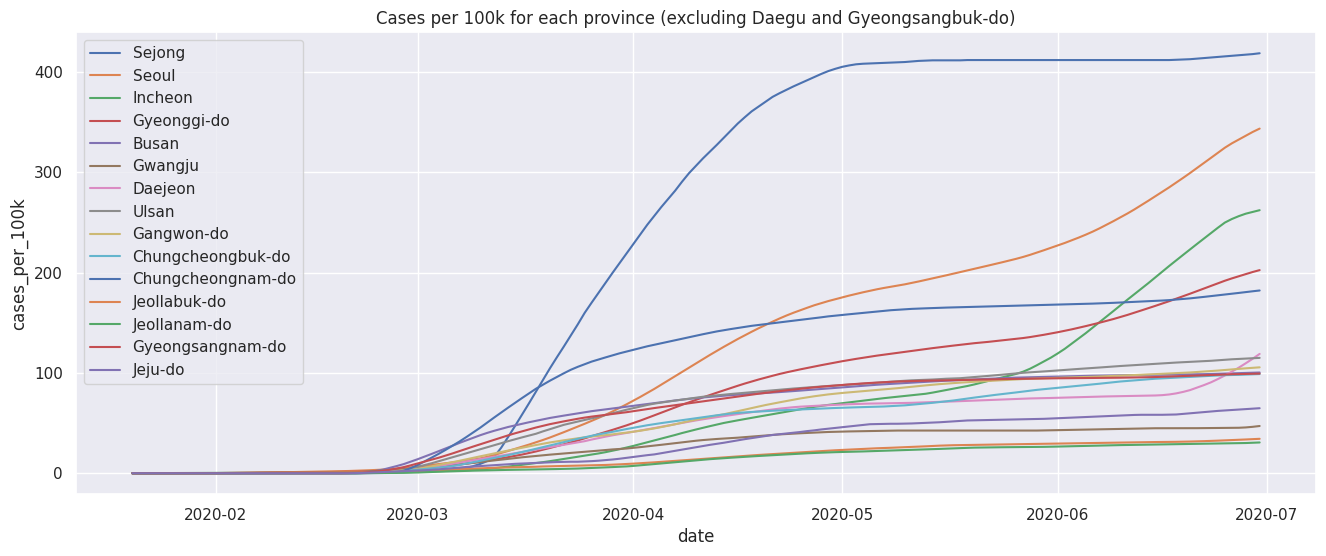

In [162]:
fig, ax = plt.subplots(figsize=(16, 6))

# Define the order of provinces
desired_order = ['Sejong', 'Seoul', 'Incheon', 'Gyeonggi-do', 'Busan', 'Gwangju', 'Daejeon', 'Ulsan', 'Gangwon-do',
                 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 'Gyeongsangnam-do', 'Jeju-do']

for province in desired_order:
    df_name = f"df_ppopulation_{province.lower().replace('-', '').replace(' ', '')}"
    if df_name in province_dataframes:
        sns.lineplot(x='date', y='cases_per_100k', data=province_dataframes[df_name], label=province)

ax.set_title("Cases per 100k for each province (excluding Daegu and Gyeongsangbuk-do)")
plt.legend()
plt.show()

We have taken out Daegu and Gyeongsangbuk-do provinces since they fall out of a graph. The covid-19 pandemic started to get traction from March of 2020.

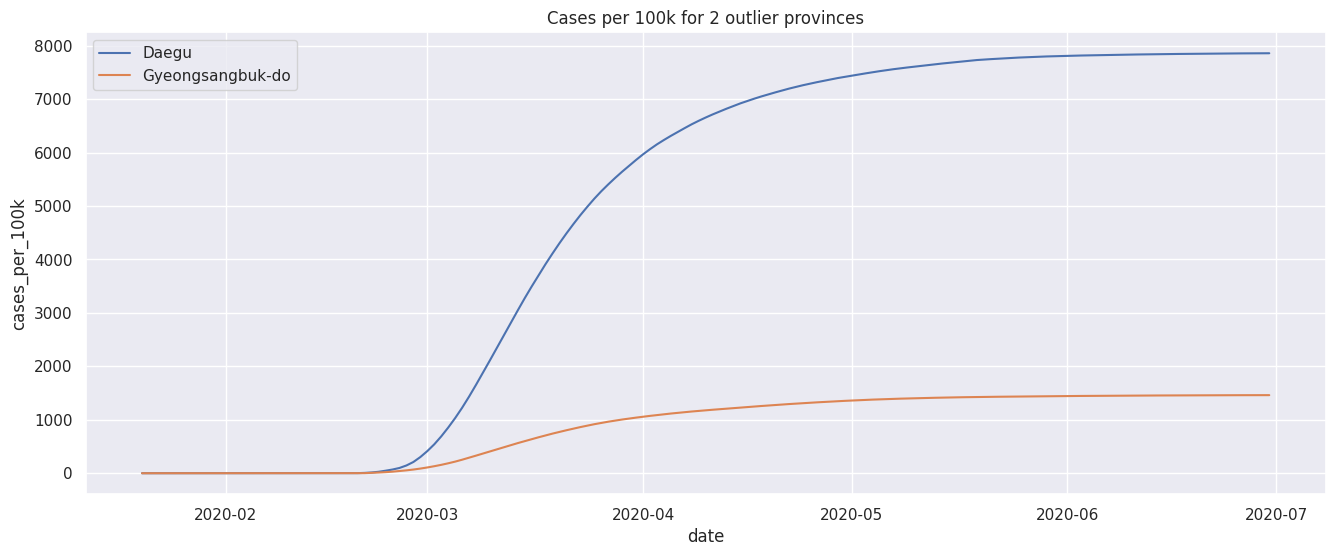

In [163]:
fig, ax = plt.subplots(figsize=(16, 6))

outlier_provinces = ['Daegu', 'Gyeongsangbuk-do']

for province in outlier_provinces:
    df_name = f"df_ppopulation_{province.lower().replace('-', '').replace(' ', '')}"
    sns.lineplot(x='date', y='cases_per_100k', data=province_dataframes[df_name], label=province)

ax.set_title("Cases per 100k for 2 outlier provinces")
plt.legend()
plt.show()

By looking at these 2 graphs, we want to check if province population density correlates with confirmed cases per 100k people

In [164]:
df_province_population_density = df_province_population.copy()

In [165]:
df_province_population_density["area-km"] = df_province_population_density["area-km"].str.replace(',', '').astype(int)
df_province_population_density["population(2020)"] = df_province_population_density["population(2020)"].str.replace(',', '').astype(int)

In [166]:
df_province_population_density["ppl_per_sq_km"] = df_province_population_density["population(2020)"] / df_province_population_density["area-km"]

In [167]:
df_province_population_density["ppl_per_sq_km"] = df_province_population_density["ppl_per_sq_km"].round(0).astype(int)

In [168]:
provinces = ['Sejong', 'Seoul', 'Busan', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan', 'Gyeonggi-do', 'Gangwon-do',
             'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do', 'Daegu']

selected_date = "2020-06-30"

province_data = {}

for province in provinces:
    df_name = f"df_ppopulation_{province.lower().replace('-', '').replace(' ', '')}"
    province_data[province.lower().replace('-', '').replace(' ', '')] = province_dataframes[df_name].loc[
        province_dataframes[df_name]["date"] == selected_date, ["cases_per_100k", "province"]
    ]

In [169]:
df_merged_p_density = df_province_population_density.copy()

df_merged_provinces = pd.concat(province_data.values())

df_merged_p_density = df_merged_p_density.merge(df_merged_provinces, on='province')

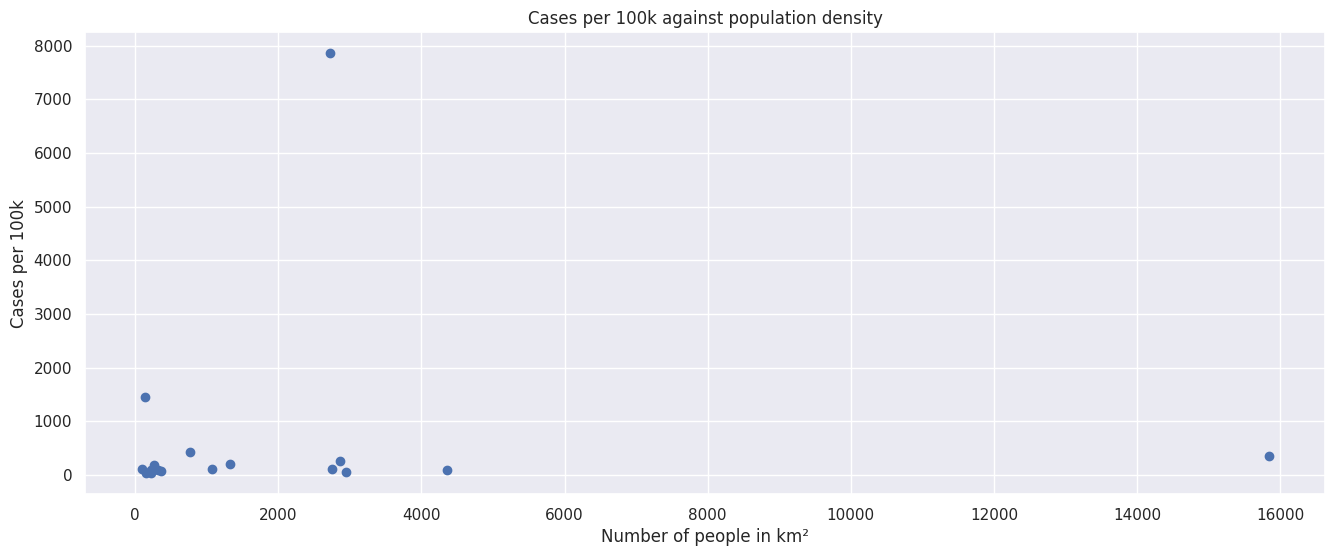

In [170]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.scatter(x=df_merged_p_density['ppl_per_sq_km'], y=df_merged_p_density['cases_per_100k'])

plt.xlabel('Number of people in km²')
plt.ylabel('Cases per 100k')

ax.set_title("Cases per 100k against population density")

plt.show()

Since there is one outlier with many times bigger number of cases per 100k, we will remove it to get a better glimpse at data

In [171]:
df_merged_p_density = df_merged_p_density[df_merged_p_density['province'] != 'Daegu']

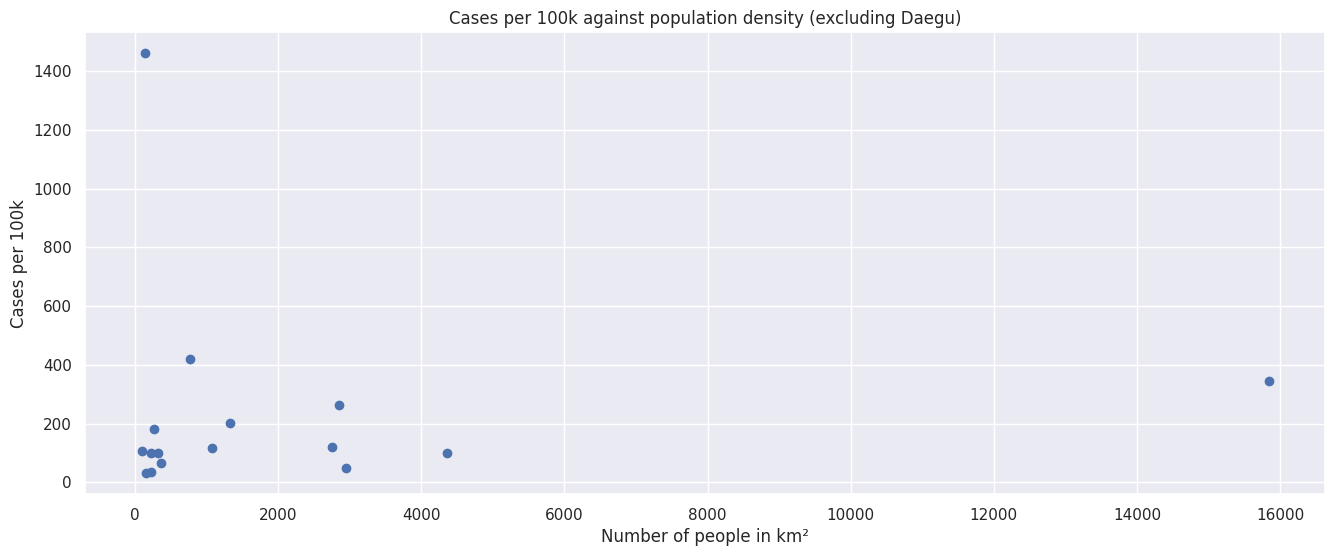

In [172]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.scatter(x=df_merged_p_density['ppl_per_sq_km'], y=df_merged_p_density['cases_per_100k'])

plt.xlabel('Number of people in km²')
plt.ylabel('Cases per 100k')

ax.set_title("Cases per 100k against population density (excluding Daegu)")

plt.show()

In [173]:
df_merged_p_density = df_merged_p_density.drop(["province"], axis=1)

<Axes: >

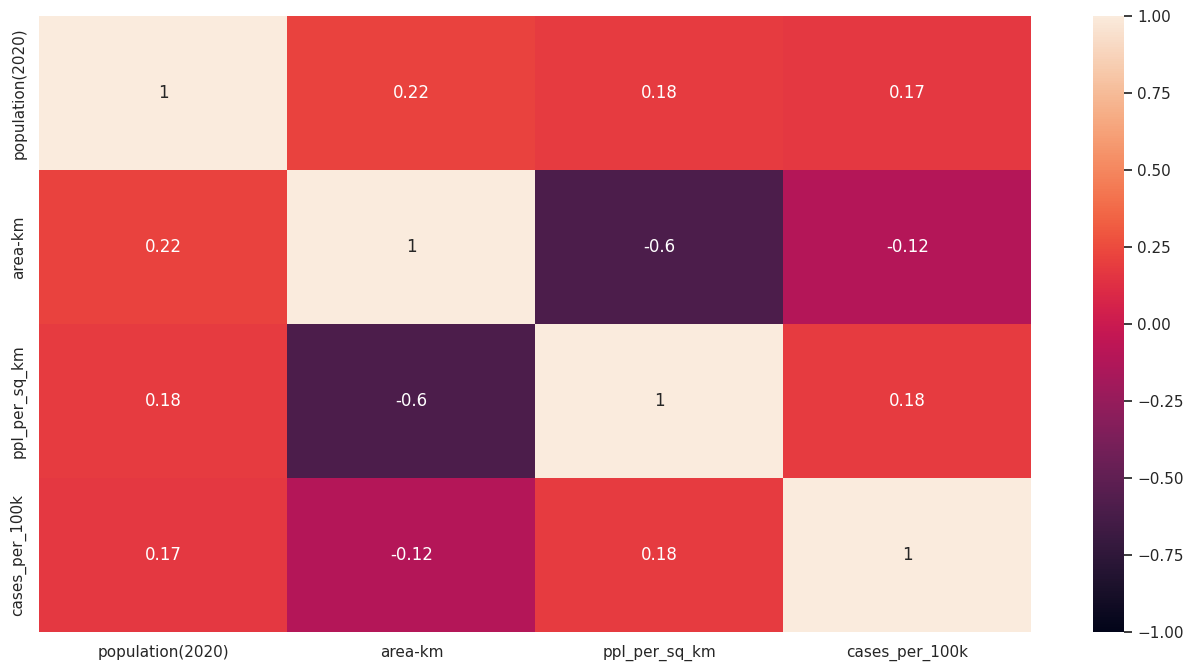

In [174]:
corr = df_merged_p_density.corr(method='kendall')
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

We can see that there is a slight possitive correleation between population per square kilometer and covid cases per 100k but for any conclutions, we would need to do more research to understand whether there is strong correlation between those two variables. In 2019, there was a research done by  Institute for Medical Research, National Institutes of Health and Ministry of Health Malaysia which analyzed "Correlation between Population Density and COVID-19 Cases during the Third Wave in Malaysia: Effect of the Delta Variant". Link: "https://pubmed.ncbi.nlm.nih.gov/35742687/".  Results of this reasearch indicates that there is a high correlation in districts of Malaysa between population density and covid-19 cases of delta variant. There could be 2 reasons why we did not get high correlation number. 1. This only affects Delta variant 2. Population in provinces of Korea is more spread out than in districts of Malaysa since they mostly have lower square killometers area than provinces of Korea.

## 5. Policy effects on confirmed cases

**Biggest** increase in covid cases per 100k people was between 2020-03 until 2020-04-16

Health | Mask Distribution 	Public-Sale 	2020-02-27

Education | School Opening Delay 	Elementary School 	2020-03-02 	2020-04-06

Education | School Opening Delay 	Middle School 	2020-03-02 	2020-04-06

Education | School Opening Delay 	High School 	2020-03-02 	2020-04-06

Education | School Opening Delay 	Kindergarten 	2020-03-02 	2020-04-06

Health | Drive-Through Screening Center	Standard Operating Procedures 	2020-03-04

Technology | Self-Quarantine Safety Protection App 2020-03-07

Health | Mask Distribution 	5-day Rotation System 	2020-03-09

Social | Social Distancing Campaign 	Strong 	2020-03-22 	2020-04-19

Immigration | Mandatory 14-day Self-Quarantine 	from all the countries 	2020-04-01

Education | School Opening with Online Class 	Middle School (3rd grade) 	2020-04-09 	2020-05-27

Education | School Opening with Online Class 	High School (3rd grade) 	2020-04-09 	2020-05-20

Immigration | Mandatory Self-Quarantine & Diagonostic Tests	from U.S. 	2020-04-13

Education | School Opening with Online Class 	High School (2nd grade) 	2020-04-16 	2020-05-27

Education | School Opening with Online Class 	High School (1st grade) 	2020-04-16 	2020-06-03

Education | School Opening with Online Class 	Middle School (2nd grade) 	2020-04-16 	2020-06-03

Education | School Opening with Online Class 	Middle School (2nd grade) 	2020-04-16 	2020-06-03

Education | School Opening with Online Class 	Elementary School (5th ~ 6th grade) 	2020-04-16 	2020-06-08

Education | School Opening with Online Class 	Elementary School (4th grade) 	2020-04-16 	2020-06-03

Social | Social Distancing Campaign 	Weak 	2020-04-20 	2020-05-05

Education | School Opening with Online Class 	Elementary School (3rd grade) 	2020-04-20 	2020-06-03

Education | School Opening with Online Class 	Elementary School (3rd grade) 	2020-04-20 	2020-06-03

In [175]:
df_policy.start_date = pd.to_datetime(df_policy.start_date, errors = 'coerce')
df_policy.end_date = pd.to_datetime(df_policy.end_date, errors = 'coerce')

In [176]:
df_policy['duration'] = (df_policy['end_date'] - df_policy['start_date'])

In [177]:
df_policy['duration'] = df_policy['duration']/np.timedelta64(1, 'D')

In [178]:
df_policy['start_month'] = df_policy['start_date'].dt.month

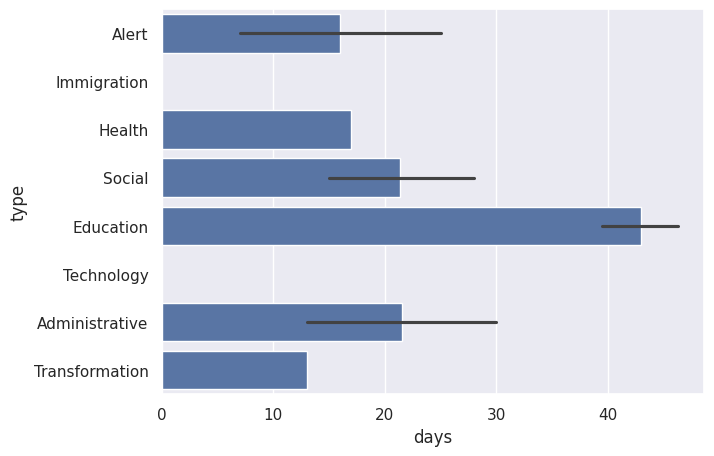

In [179]:
plt.figure(figsize = (7,5))
sns.barplot(x='duration', y='type',data = df_policy)

plt.xlabel("days")

ax.set_title("Duration of policy type in days")

plt.show()

Longest duration of policy type implementet were Education

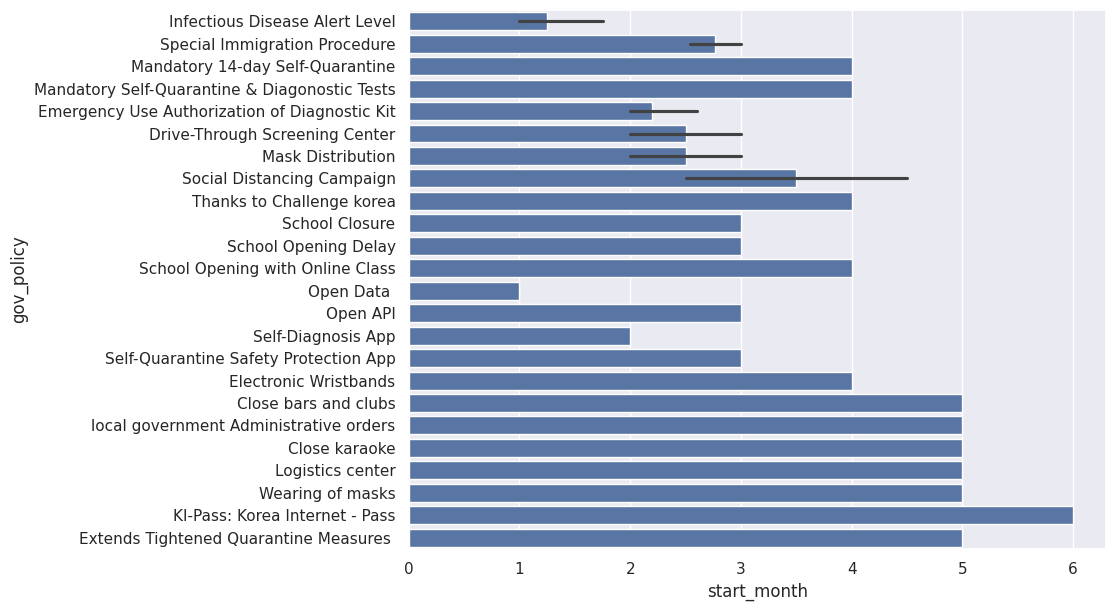

In [180]:
#@markdown Open data was the first policy applied.
plt.figure(figsize= (9,7))
sns.barplot(x='start_month', y='gov_policy', data=df_policy)

ax.set_title("Policy implementation month")

plt.show()

Open data was the first policy applied.

## Heatmap of combined data

In [181]:
df_search["date"] = pd.to_datetime(df_search["date"], format='%Y/%m/%d')

In [182]:
df_time["date"] = pd.to_datetime(df_time["date"], format='%Y-%m-%d')

In [183]:
df_merged1 = df_time.merge(df_search, how='left', on="date")

In [184]:
df_merged1 = df_merged1.drop(df_merged1.index[162])
df_merged1 = df_merged1.drop("time", axis=1)

In [185]:
df_weather["date"] = pd.to_datetime(df_weather["date"], format='%Y/%m/%d')

In [186]:
df_merged2 = df_weather.merge(df_region,how='left', on='province')

In [187]:
df_merged2 = df_merged2.drop(["code_x", "code_y", "city", "latitude", "longitude"], axis=1)

In [188]:
df_merged3 = df_merged2.merge(df_merged1, how='left', on='date')

In [189]:
df_merged3 = df_merged3.dropna().reset_index()

In [190]:
df_merged4 = df_merged3.drop(["index", "province", "date"], axis=1)

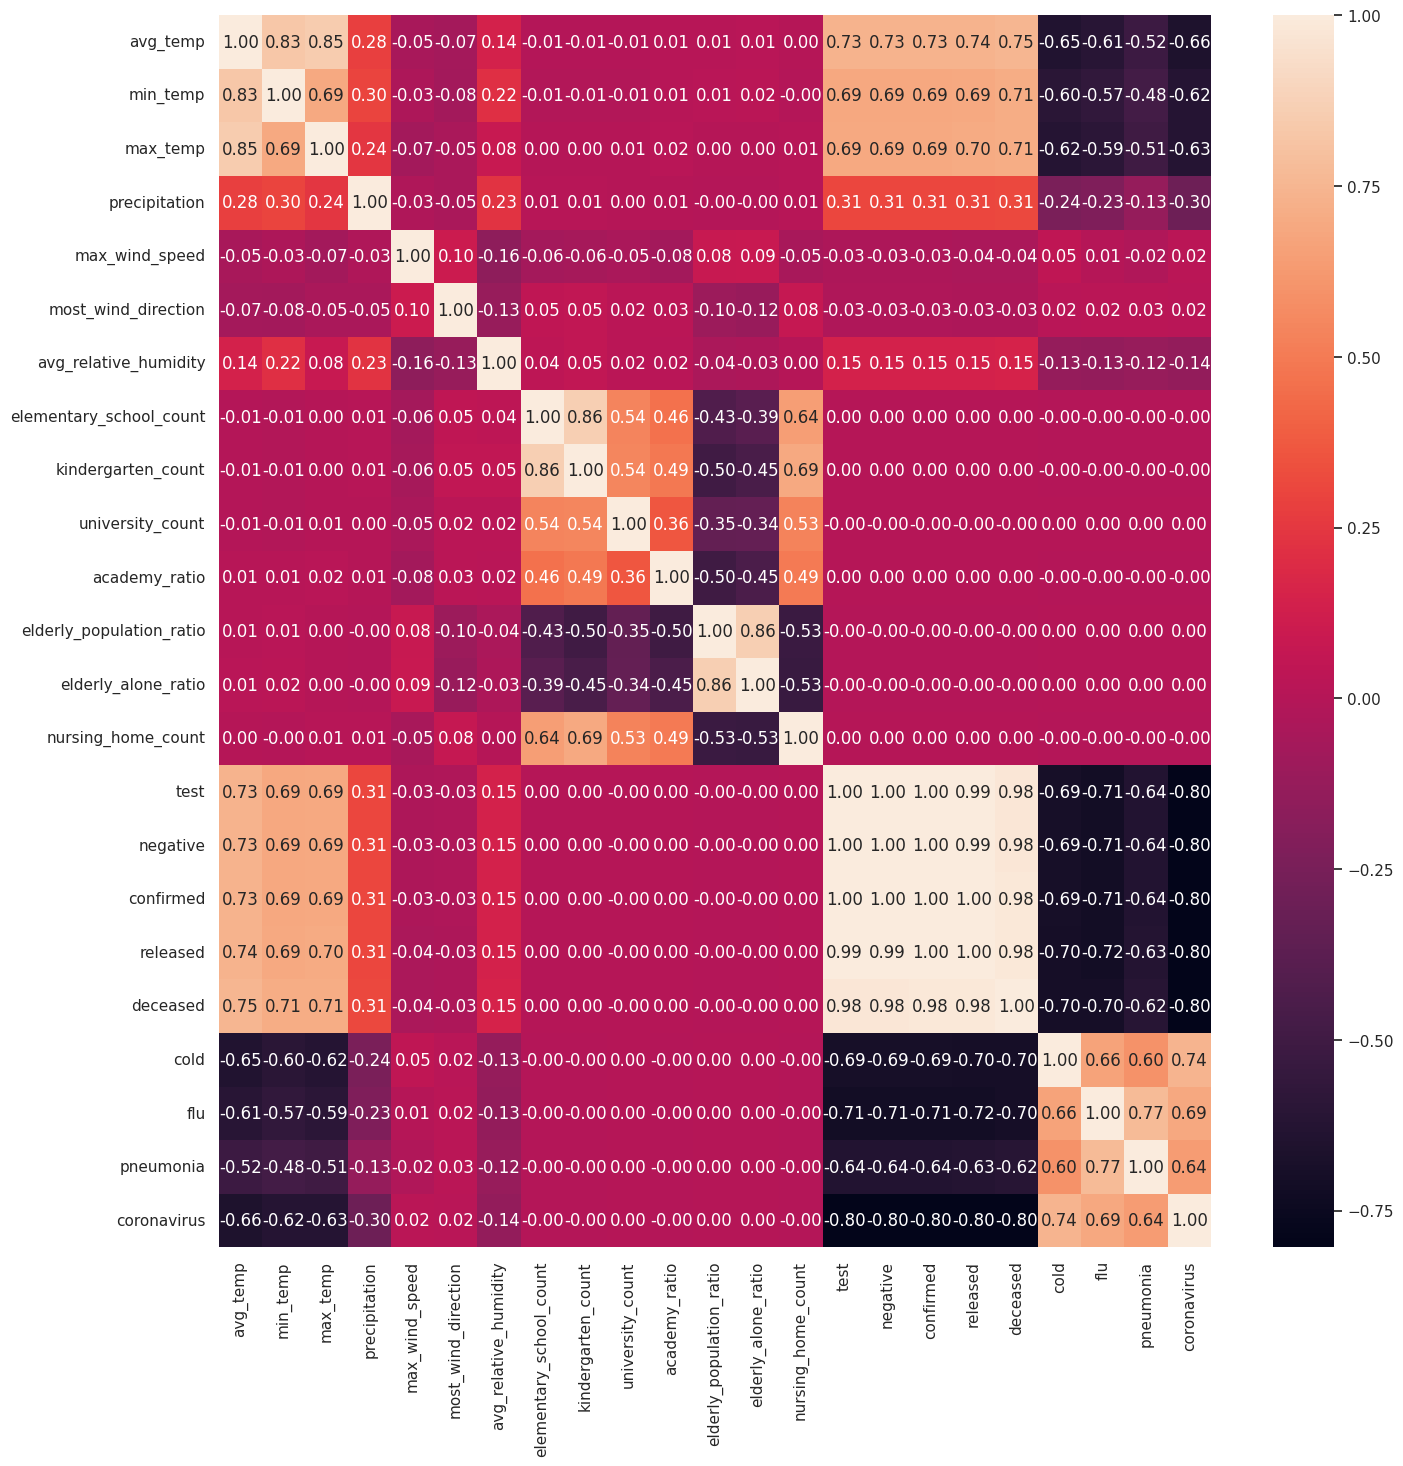

In [191]:
corr = df_merged4.corr(method='kendall')
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, fmt='.2f')

plt.show()

1.   0.69 correlation between min_temp and confirmed cases. We can try creating a linear regression model to predict covid cases count based on weather data.
2.   cold and flu has -0.69 and -0.71 correlation with confirmed cases. This indicates that with increasing covid cases, people google less of cold and flu.




## PCA

In [192]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [193]:
df_merged4 = df_merged4.drop(["test", "negative", "released", "deceased"], axis=1)

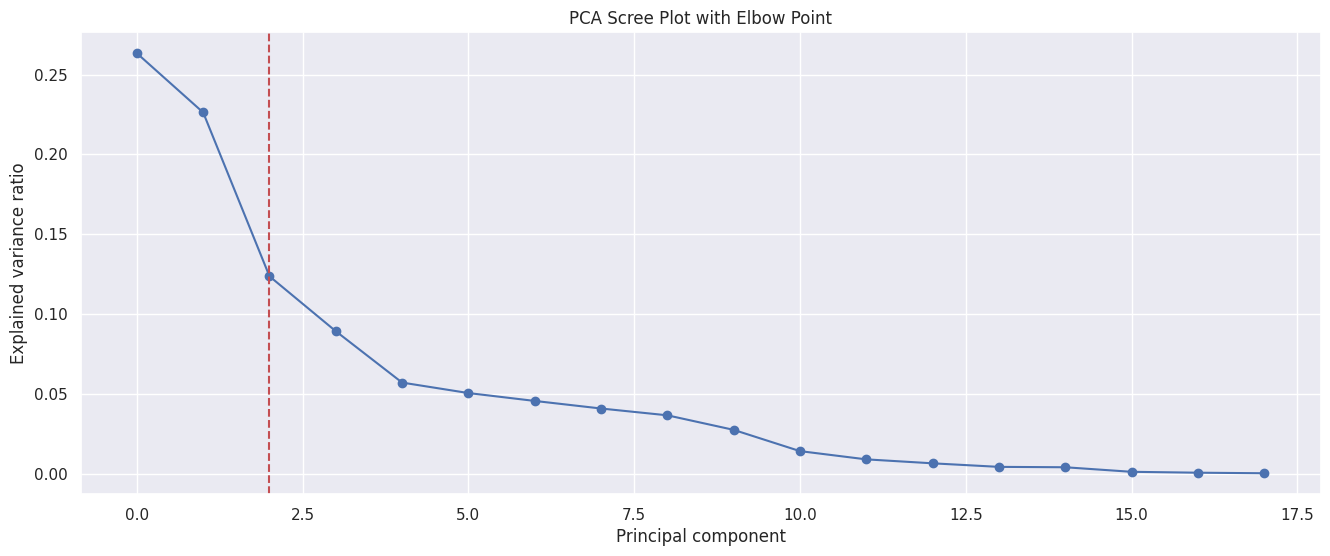

In [194]:
data = df_merged4.copy()

y = data['confirmed']
X = data.drop('confirmed', axis=1)

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_norm)

explained_var = pca.explained_variance_ratio_

diff = np.diff(explained_var)

diff_diff = np.diff(diff)

elbow_index = np.argmax(diff_diff) + 1

fig = plt.figure(figsize=(16, 6))
plt.plot(range(len(explained_var)), explained_var, marker='o')
plt.axvline(x=elbow_index, color='r', linestyle='--')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('PCA Scree Plot with Elbow Point')
plt.show()

In [195]:
loadings = pca.components_
average_loadings = np.abs(loadings).mean(axis=0)

sorted_indices = np.argsort(average_loadings)[::-1]

important_features = X.columns[sorted_indices]

In [196]:
print(important_features)

Index(['max_temp', 'max_wind_speed', 'avg_relative_humidity', 'min_temp',
       'pneumonia', 'flu', 'kindergarten_count', 'most_wind_direction', 'cold',
       'elderly_population_ratio', 'precipitation', 'avg_temp',
       'elementary_school_count', 'coronavirus', 'elderly_alone_ratio',
       'university_count', 'nursing_home_count', 'academy_ratio'],
      dtype='object')


These are the features ranked on importance for confirmed cases number. Unfortunately this does not tell us a lot, apart that count of institutions affect confirmed cases, and this can mean that the bigger population, the more covid cases there will be.

## Linear Regression

We will try to combine some data and create a model which would predict covid cases count based on weather.

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [198]:
df_patient["confirmed_date"] = pd.to_datetime(df_patient["confirmed_date"], format='%Y/%m/%d')


In [199]:
df_patient3 = df_patient.copy()
df_weather3 = df_weather.copy()

In [200]:
df_patient3 = df_patient3.drop(["infection_case", "infected_by", "symptom_onset_date", "released_date", "deceased_date", "state", "city", "country", "contact_number", "patient_id"], axis=1)

In [201]:
df_patient3["confirmed_date"] = pd.to_datetime(df_patient3["confirmed_date"], format='%Y/%m/%d')
df_weather3["date"] = pd.to_datetime(df_weather3["date"], format='%Y/%m/%d')

In [202]:
df_merged5 = pd.merge(df_patient3, df_weather3, how='left', right_on=['date', "province"], left_on=['confirmed_date',"province"])

In [203]:
df_seoul_cases = df_merged5.loc[df_merged5["province"] == 'Seoul'] # Since weather data differs for all provinces, we will choose a random one - Seoul

In [204]:
df_seoul_cases = df_seoul_cases.loc[:, ["date", "avg_temp", "precipitation", "max_wind_speed", "avg_relative_humidity"]]

In [205]:
df_seoul_cases = df_seoul_cases.groupby('date').agg(  # Calculating count of covid cases for each day
    count=('date', 'size'),
    precipitation=('precipitation', 'first'),
    max_wind_speed=('max_wind_speed', 'first'),
    avg_relative_humidity=('avg_relative_humidity', 'first'),
    avg_temp=('avg_temp', 'mean')
).reset_index()

In [206]:
df_seoul_cases['count'] = df_seoul_cases['count'].shift(-4)
df_seoul_cases = df_seoul_cases.drop(df_seoul_cases.index[-4:])
df_seoul_cases.reset_index(drop=True, inplace=True)

Since we discovered that on average it takes around 4.5 days from simptoms on set date to confirmed covid case, we shifted our count data back by 4days, so the weather data would better represent covid case count affected.

In [207]:
X = df_seoul_cases[['precipitation', 'max_wind_speed', 'avg_relative_humidity', 'avg_temp']]
y = df_seoul_cases['count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 48.95187060606196
R-squared: 0.055712372568249235


MSE values suggests that on average, the squared difference between the predicted values and the actual values is approximately 43.18. Our coefficient of determination (R-squared) 0.17 suggests that proportion of the variance in the dependent variable that can be explained by the independent variables is low.

We can try creating linear regression model by using confirmed cases data from merged dataframe.

In [208]:
df_merged4['confirmed'] = df_merged4['confirmed'].shift(-4) # Shifting data by 4 days
df_merged4 = df_merged4.drop(df_merged4.index[-4:])
df_merged4.reset_index(drop=True, inplace=True)

In [209]:
X = df_merged4[['precipitation', 'max_wind_speed', 'avg_relative_humidity', 'avg_temp']]
y = df_merged4['confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 7906139.4411069425
R-squared: 0.6372262508084021


R^2 score is quite good, although mean square error indicates that our values are far spread off

## Significance testing

Determine weather there is statisticaly significant diffrence comparing deaths of covid within age group of 20s-40s and 60s-80s

H0: Number of deaths of covid-19 is equal for age groups of 20-40 and 60-80 <br>
H1: Number of deaths is greater for age group 60-80 <br>
Significance level: alpha = 0.01


In [210]:
import math

In [211]:
df_tage2 = df_tage.copy()

In [212]:
df_tage2 = df_tage2.drop(["date", "time"], axis=1)

In [213]:
array1 = ["20s", "30s", "40s"]
df_con = df_tage2.loc[df_tage2["age"].isin(array1)].reset_index()

array2 = ["60s", "70s", "80s"]
df_exp = df_tage2.loc[df_tage2["age"].isin(array2)].reset_index()

In [214]:
df_exp["d_rate"] = df_exp["deceased"] / df_exp["confirmed"]
exp_d_rate_mean = df_exp["deceased"].mean()
exp_d_rate_std = df_exp["deceased"].std()
n1 = df_exp.deceased.count()

In [215]:
df_exp.deceased.count()

363

In [216]:
df_con["d_rate"] = df_con["deceased"] / df_con["confirmed"]
con_d_rate_mean = df_con["deceased"].mean()
con_d_rate_std = df_con["deceased"].std()
n2 = df_con.deceased.count()

In [217]:
test_stat = (exp_d_rate_mean - con_d_rate_mean) / math.sqrt( ( (exp_d_rate_std * exp_d_rate_std) / n1 ) + ( (con_d_rate_std * con_d_rate_std) / n2 ) )
p_value = 0.00001

print("The computed T test statistic is: ", test_stat)
print("The p-value is:", p_value)

The computed T test statistic is:  30.198272397921222
The p-value is: 1e-05


In [218]:
Xcon = df_con["confirmed"].sum()
Xexp = df_exp["confirmed"].sum()
Ncon = df_con["deceased"].sum()
Nexp = df_exp["deceased"].sum()

In [219]:
cr_con = ((Xcon) / (Ncon))
cr_exp = ((Xexp) / (Nexp))
cr_diff = (cr_exp) - (cr_con)
print(cr_con, cr_exp, cr_diff)

1332.5480572597137 12.55209131953318 -1319.9959659401804


We **reject the null hypethesis** at 1% significance level.
There is sufficient evidence to support claim that there is statisticaly significant diffrence between deaths of covid within age group of 20s-40s and 60s-80s

## Major conclusions

1.   Covid breakthroughs happens extremely fast, numbers of infected can double within days.

2.   People in age group of 60+ has a bigger risk of dying from covid infection than people from age group of 20-40

3.   On average, it takes around 4.5 days from first symptoms to confirmed decease.

4.   Negative correlation of cold and flu against confirmed cases indicates that with cold and flu cases decrease with increasing covid cases.

5. Government policies are extremely important to reduce the spread of covid-19 infection

Plan:
1. Making open covid-19 data from first confirmed cases for other data scientists.
2. From first infections of covid-19, opening up posts where people can test for covid-19 infection for free.
3. Free test kits for every household, in order to reduce time between symptoms on set date to confirmed case.
4. Prioritizing population of age 60+ for hospitalization, since they are way more likely to get deceased.
5. Implementing government policies from early on.